* ## Work on Both Numerical and Categorical Data
* ## Similary Effect on Data Distribution and variance
* ## Good Work on Linear Algorithms


* ## Distrubed Co-Variance (relationship)
* ## Can't Work on Decision Tree base Algorithms
* ## Consume Storage

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./titanic_toy.csv",usecols=["Survived","Age","Fare"])
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [3]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [4]:
x = df.drop(columns=["Survived"])
y = df.Survived

In [5]:
xtrain,xtest ,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
xtrain["Age_Impute"] = xtrain.Age

In [7]:
xtest["Age_Impute"] = xtest.Age

# Apply Random Value

* ##  remove null value

# Age

In [8]:
clean_values = xtrain.Age.dropna()
clean_values

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
360    40.0
75     25.0
299    50.0
534    30.0
493    71.0
Name: Age, Length: 564, dtype: float64

* ## Total Length of missing value

In [9]:
length_nulls = xtrain.Age.isnull().sum()
length_nulls

148

* ## Random Samples values

### Note .sample(length,random_state=length).values
### random_state are changes the values if the code are again run

In [10]:
rnd_val = clean_values.sample(length_nulls,random_state=length_nulls).values

In [11]:
rnd_val

array([10. , 30. , 40. ,  4. , 27. , 54. , 50. , 15. , 35. , 25. ,  4. ,
        1. , 36. , 62. ,  3. , 24. , 24. , 24. , 36. , 58. , 26. , 14. ,
       30. , 20. , 43. , 42. , 19. ,  4. ,  9. , 22. , 36. , 36. ,  3. ,
       25. , 18. , 18. , 20. ,  1. , 29. , 58. , 16. , 25. , 45. , 21. ,
       30. , 22. , 30. , 16. , 14. , 35. , 36. , 40. , 34. , 29. , 41. ,
        9. , 52. , 36.5, 54. , 37. , 31. , 51. , 19. , 24. , 37. , 33. ,
       28. , 31. ,  9. , 33. , 60. , 28. , 21. , 40.5, 24. , 38. , 45.5,
       30. ,  2. , 32.5, 35. , 58. , 50. , 31. , 27. , 16. , 26. , 24. ,
       13. , 34. , 39. , 24. , 35. , 25. , 21. , 36. , 41. , 42. ,  4. ,
       18. , 46. , 32. , 23. , 21. , 47. , 23. , 32. , 22. , 42. , 28. ,
       30. , 19. , 19. , 14. , 23. , 17. ,  8. , 48. , 24. , 53. , 28. ,
       22. , 44. , 26. , 64. , 32. , 27. , 36. , 32. , 18. , 27. , 29. ,
       16. , 43. , 28. , 25. , 36. , 63. , 11. , 21. , 39. , 18. , 24. ,
       17. , 18. , 34. , 24. ,  9. ])

* ## Add Random Samples on Age_Impute Missing values

In [12]:
xtrain["Age_Impute"][xtrain["Age_Impute"].isnull()] = rnd_val

In [13]:
xtrain.head()

,Age,Fare,Age_Impute
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


# Compare Age and Age_Impute

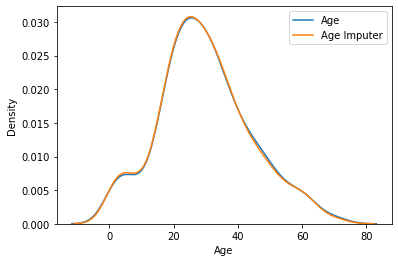

In [14]:
sns.kdeplot(xtrain["Age"],label="Age")
sns.kdeplot(xtrain["Age_Impute"],label="Age Imputer")


plt.legend()
plt.show()

# Check variance

In [15]:
xtrain.Age.var()

204.3495133904614

In [16]:
xtrain.Age_Impute.var()

201.91025190959846

# Check Co-Variance

In [17]:
xtrain[["Fare","Age","Age_Impute"]].cov()

,Fare,Age,Age_Impute
Fare,2448.197914,70.719262,67.317322
Age,70.719262,204.349513,204.349513
Age_Impute,67.317322,204.349513,201.910252


# Check Outliers

<AxesSubplot:>

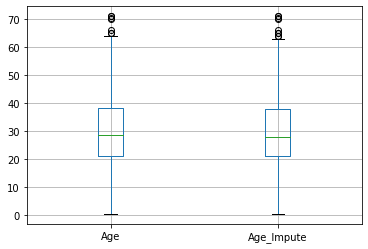

In [18]:
xtrain[["Age","Age_Impute"]].boxplot()

# Categorical Data

In [19]:
df = pd.read_csv("./house.csv",usecols=["GarageQual","FireplaceQu","SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [20]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [21]:
x = df
y = df.SalePrice

In [22]:
xtrain,xtest ,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
xtrain["GarageQual_Impute"] = xtrain.GarageQual
xtest["GarageQual_Impute"] = xtest.GarageQual

xtrain["FireplaceQu_Impute"] = xtrain.FireplaceQu
xtest["FireplaceQu_Impute"] = xtest.FireplaceQu


In [24]:
xtrain.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_Impute,FireplaceQu_Impute
1016,TA,TA,203000,TA,TA
785,Gd,TA,161500,TA,Gd
426,TA,TA,275000,TA,TA
1031,TA,TA,197000,TA,TA
1024,Gd,TA,287000,TA,Gd


# Apply Random Technique

In [25]:
# GarageQual xtrain
length = xtrain.GarageQual.isnull().sum()
xtrain["GarageQual_Impute"][xtrain["GarageQual_Impute"].isnull()] = xtrain.GarageQual.dropna().sample(length,random_state=length).values



# GarageQual xtest
length = xtest.GarageQual.isnull().sum()
xtest["GarageQual_Impute"][xtest["GarageQual_Impute"].isnull()] = xtest.GarageQual.dropna().sample(length,random_state=length).values


# FireplaceQu xtrain
length = xtrain.FireplaceQu.isnull().sum()
xtrain["FireplaceQu_Impute"][xtrain["FireplaceQu_Impute"].isnull()] = xtrain.FireplaceQu.dropna().sample(length,random_state=length).values

# FireplaceQu xtest
length = xtest.FireplaceQu.isnull().sum()
xtest["FireplaceQu_Impute"][xtest["FireplaceQu_Impute"].isnull()] = xtest.FireplaceQu.dropna().sample(length,random_state=length).values


/tmp/ipykernel_9973/3171202674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain["GarageQual_Impute"][xtrain["GarageQual_Impute"].isnull()] = xtrain.GarageQual.dropna().sample(length,random_state=length).values
/tmp/ipykernel_9973/3171202674.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest["GarageQual_Impute"][xtest["GarageQual_Impute"].isnull()] = xtest.GarageQual.dropna().sample(length,random_state=length).values
/tmp/ipykernel_9973/3171202674.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

In [26]:
xtrain.isnull().sum()

FireplaceQu           557
GarageQual             65
SalePrice               0
GarageQual_Impute       0
FireplaceQu_Impute      0
dtype: int64

In [27]:
xtest.isnull().sum()

FireplaceQu           133
GarageQual             16
SalePrice               0
GarageQual_Impute       0
FireplaceQu_Impute      0
dtype: int64

# Check Frequency 
### org = Missing values_counts() / len(drop missing values) 
### imp = Missing values_count() / len(data)

In [28]:
org = pd.DataFrame(xtrain.GarageQual.value_counts() / len(xtrain.GarageQual.dropna()))
imp = xtrain.GarageQual_Impute.value_counts() / len(xtrain)
org["GarageQual_Impute"] = imp
org

,GarageQual,GarageQual_Impute
TA,0.951043,0.948630
Fa,0.037171,0.040240
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [29]:
org2 = pd.DataFrame(xtrain.FireplaceQu.value_counts() / len(xtrain.FireplaceQu.dropna()))
imp2 = xtrain.FireplaceQu_Impute.value_counts() / len(xtrain)
org2["FireplaceQu_Impute"] = imp2
org2

,FireplaceQu,FireplaceQu_Impute
Gd,0.494272,0.494007
TA,0.412439,0.410959
Fa,0.040917,0.041952
Po,0.027823,0.029110
Ex,0.024550,0.023973


# Plot Graph

# GarageQual

In [30]:
xtrain.FireplaceQu

455      TA
863     NaN
504      Fa
1413     Gd
1389     Gd
       ... 
466      Po
299      Gd
493      Fa
527      Gd
1192    NaN
Name: FireplaceQu, Length: 1168, dtype: object

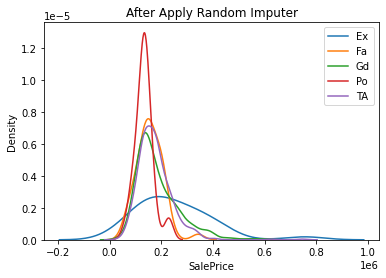

In [35]:
for i in sorted((xtrain.FireplaceQu_Impute.dropna()).unique()):
    sns.kdeplot(xtrain[xtrain["FireplaceQu_Impute"]==i]["SalePrice"],label=i)
plt.legend()
plt.title("After Apply Random Imputer")
plt.show()

# kdeplot

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


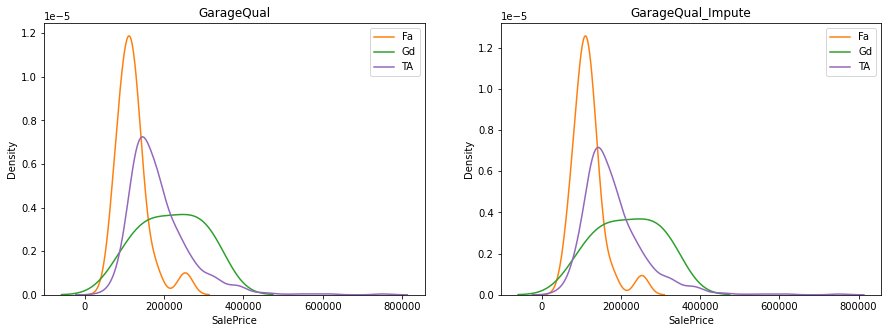

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(121)
for i in sorted(xtrain.GarageQual.dropna().unique()):
    sns.kdeplot(xtrain[xtrain.GarageQual == i]["SalePrice"],label=i)
plt.legend()
plt.title("GarageQual")

plt.subplot(122)

for i in sorted(xtrain.GarageQual_Impute.dropna().unique()):
    sns.kdeplot(xtrain[xtrain['GarageQual_Impute'] == i]["SalePrice"],label=i)

plt.legend()
plt.title("GarageQual_Impute")

plt.show()

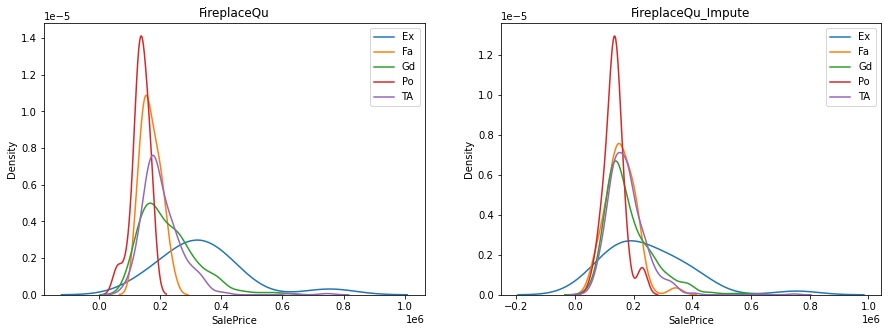

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(121)
for i in sorted(xtrain.FireplaceQu.dropna().unique()):
    sns.kdeplot(xtrain[xtrain.FireplaceQu == i]["SalePrice"],label=i)
plt.legend()
plt.title("FireplaceQu")

plt.subplot(122)

for i in sorted(xtrain.FireplaceQu_Impute.dropna().unique()):
    sns.kdeplot(xtrain[xtrain.FireplaceQu_Impute == i]["SalePrice"],label=i)

plt.legend()
plt.title("FireplaceQu_Impute")

plt.show()

## Random Impute are not Good For FireplaceQu Column on Categorical data !